In [1]:
from easy_coloc import lib_easy_coloc
import xarray as xr
import pandas as pd
import cartopy as cart
import matplotlib.pylab as plt
from matplotlib import cm
import datetime
import cmocean
import numpy as np
import dateutil

In [2]:
%matplotlib inline

In [3]:
#colormap properties
#max, min, colormap, nsteps, clabel steps, conversion factor

cprops= {'dissic':(1900,2240,cmocean.cm.turbid,34,100,1e3)}

In [4]:
ovar = 'dissic'
model = 'CanESM5'
coord_dict = {'CanESM5':{'lev':'depth'}} # a dictionary for converting coordinate names
forcing = 'ssp245'
realization = 'r10i1p1f1'

# Load in the CMIP6 data

In [5]:
ddir = f'/local/data/artemis/workspace/sridge/ocean/{ovar}_Omon_{model}_{forcing}_{realization}_gn_201501-202012.nc'
ds = xr.open_dataset(f'{ddir}')
ds = ds.rename(coord_dict[model])
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, depth: 45, i: 360, j: 291, time: 72, vertices: 4)
Coordinates:
  * time                (time) object 2015-01-16 12:00:00 ... 2020-12-16 12:00:00
  * depth               (depth) float64 3.047 9.454 ... 5.375e+03 5.625e+03
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object ...
    lev_bnds            (depth, bnds) float64 ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    dissic              (time, depth, j, i) float32 ...
Attributes:
    CCCma_model_hash:            11d086766aa63052b5dce6696c4cf2c23f110ee7
    CCCma_parent_runid:          rc3.1-his10
    CCCma_pycmor_hash:      

# Load in GLODAP coords

In [6]:
# load station information from csv file
df = pd.read_csv('../GLODAPv2.2019_COORDS.csv')

In [7]:
df = df.dropna()
df = df.reset_index().drop('Unnamed: 0',axis=1)
df

,index,bearing,cruise,dx,latitude,longitude,month,year
0,0,0.000000,15.0,0.000000,-53.00800,0.03060,1.0,2005.0
1,1,178.251596,15.0,54.844928,-53.50100,0.00530,1.0,2005.0
2,2,179.993223,15.0,55.263879,-53.99800,0.00520,1.0,2005.0
3,3,-178.246834,15.0,57.181294,-54.51200,0.03230,1.0,2005.0
4,4,178.652229,15.0,54.500775,-55.00200,0.01220,2.0,2005.0
5,5,179.655321,15.0,55.487285,-55.50100,0.00690,2.0,2005.0
6,6,179.666518,15.0,7.561383,-55.56900,0.00620,2.0,2005.0
7,7,179.578260,15.0,48.148722,-56.00200,0.00050,2.0,2005.0
8,8,-179.865827,15.0,55.041642,-56.49700,0.00260,2.0,2005.0
9,9,-178.361315,15.0,51.727059,-56.96200,0.02700,2.0,2005.0


# Take the month and year columns and convert them to datetime arrays

In [8]:
times = [f'{int(year)}-{int(month):02d}' for year,month in zip(df.year,df.month)]

In [9]:
df['dates'] = times 

In [10]:
sample_dates = df['dates'].sort_values().unique()

### Dates for the historical

In [11]:
# # only looking at dates in the historical period now
# sample_dates = sample_dates[0:125]
# sample_dates

### Dates for the projections

In [12]:
sample_dates = df['dates'].sort_values().unique()
sample_dates = sample_dates[125:]
sample_dates

array(['2015-04', '2015-05', '2015-06', '2015-08', '2015-09', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-11', '2016-12', '2017-01', '2017-02'],
      dtype=object)

In [13]:
sample_dates = [dateutil.parser.parse(date) - pd.Timedelta('14 day') for date in sample_dates]

# Use these dates to index into the CMIP6 simulation output

In [14]:
# shift dates to middle of the month
ds['time'] = pd.date_range(start=f'{ds.time.dt.year[0].values}-{ds.time.dt.month[0].values:02}',
                        end=f'{ds.time.dt.year[-1].values}-{ds.time.dt.month[-1].values:02}',
                        freq='MS')
ds.time

<xarray.DataArray 'time' (time: 72)>
array(['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-0

In [15]:
ovar = ds[ovar].sel(time=sample_dates)

In [16]:
ovar = ovar.rename({'latitude':'lat','longitude':'lon'})

# Interpolate

In [17]:
# create source grid and target section objects
# this requires lon,lat from stations and the source grid dataset containing lon,lat
proj = lib_easy_coloc.projection(df['longitude'].values,df['latitude'].values,grid=ovar,
                                 from_global=False)

In [18]:
ovar

<xarray.DataArray 'dissic' (time: 18, depth: 45, j: 291, i: 360)>
[84855600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-04-01 2015-05-01 ... 2017-02-01
  * depth    (depth) float64 3.047 9.454 16.36 ... 5.126e+03 5.375e+03 5.625e+03
  * j        (j) int32 0 1 2 3 4 5 6 7 8 ... 282 283 284 285 286 287 288 289 290
  * i        (i) int32 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
    lat      (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.51 50.23 50.01
    lon      (j, i) float64 73.5 74.5 75.5 76.5 77.5 ... 72.93 72.95 72.96 72.99
Attributes:
    standard_name:  mole_concentration_of_dissolved_inorganic_carbon_in_sea_w...
    long_name:      Dissolved Inorganic Carbon Concentration
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    units:          mol m-3
    original_name:  DIC
    history:        mltby1em3
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: 

In [19]:
# run the projection on the WOA analyzed temperature (t_an)
fld = proj.run(ovar[:])

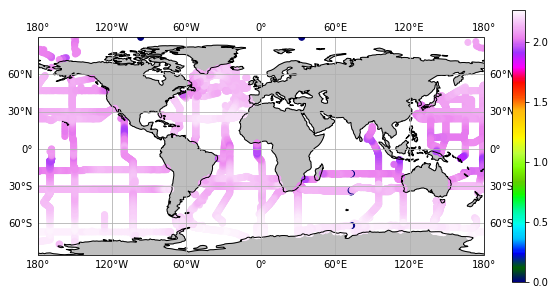

In [20]:
# plot surface data
plt.figure(figsize=[10,10])
m = plt.axes(projection=cart.crs.PlateCarree())
C = m.scatter(df['longitude'].values,df['latitude'].values,c=fld[0,0,:],cmap=cm.gist_ncar)
plt.colorbar(C,shrink=0.5)
m.coastlines()
m.add_feature(cart.feature.LAND, facecolor='0.75')
# m.set_extent([-75, -30, 30, 65], crs=cart.crs.PlateCarree())
gl = m.gridlines(draw_labels=True)

In [21]:
ovar

<xarray.DataArray 'dissic' (time: 18, depth: 45, j: 291, i: 360)>
[84855600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-04-01 2015-05-01 ... 2017-02-01
  * depth    (depth) float64 3.047 9.454 16.36 ... 5.126e+03 5.375e+03 5.625e+03
  * j        (j) int32 0 1 2 3 4 5 6 7 8 ... 282 283 284 285 286 287 288 289 290
  * i        (i) int32 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
    lat      (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.51 50.23 50.01
    lon      (j, i) float64 73.5 74.5 75.5 76.5 77.5 ... 72.93 72.95 72.96 72.99
Attributes:
    standard_name:  mole_concentration_of_dissolved_inorganic_carbon_in_sea_w...
    long_name:      Dissolved Inorganic Carbon Concentration
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    units:          mol m-3
    original_name:  DIC
    history:        mltby1em3
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: 

In [22]:
sampled_var = xr.DataArray(fld,
                           
                           dims=['time','depth','all_stations'],
                           
                           coords={'time':ovar['time'],
                                   'depth':ovar['depth'],
                                   'all_stations':df.index.values,
                                   'dx':('all_stations',df.dx.values),
                                   'bearing':('all_stations',df.bearing.values),
                                   'lat':('all_stations',df.latitude.values),
                                   'lon':('all_stations',df.longitude.values),
                                  },
                           
                           attrs={'units':ovar.units,
                                  'long_name':ovar.long_name
                                 }
                          )

sampled_var

<xarray.DataArray (time: 18, depth: 45, all_stations: 9470)>
array([[[2.229   , 2.232039, ...,      nan,      nan],
        [2.22904 , 2.232052, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[2.229504, 2.232667, ...,      nan,      nan],
        [2.22953 , 2.23268 , ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       ...,

       [[2.230356, 2.232591, ...,      nan,      nan],
        [2.23038 , 2.232616, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[2.227985, 2.229382, ...,      nan,      nan],
        [2.228006, 2.229399, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,

In [23]:
expc = pd.read_csv('../FILTERED_GLODAP_EXPOCODE.csv')

In [24]:
for cruise_id in df[df.year>=2015].groupby('cruise').mean().reset_index().cruise:

    cruise_x = df[df.cruise==cruise_id]
    
    section_dates = [dateutil.parser.parse(date) - pd.Timedelta('14 day') for date in cruise_x.dates]
    section_dates = xr.DataArray(section_dates,dims='station')
    
    stations = cruise_x.index
    stations = xr.DataArray(stations,dims='station')
    
    section = sampled_var.sel(all_stations = stations, time=section_dates)
    section.attrs['expocode'] = expc[expc.ID == cruise_id].EXPOCODE.values[0]
    section.name = ovar.name
    section.to_netcdf(f'./sections/{ovar.name}_{model}_{realization}_{section.expocode}.nc')

In [25]:
section

<xarray.DataArray 'dissic' (station: 133, depth: 45)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [2.214406, 2.214386, 2.214373, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]])
Coordinates:
    time          (station) datetime64[ns] 2015-12-01 2015-12-01 ... 2016-01-01
  * depth         (depth) float64 3.047 9.454 16.36 ... 5.375e+03 5.625e+03
    all_stations  (station) int64 9337 9338 9339 9340 ... 9466 9467 9468 9469
    dx            (station) float64 0.0 2.916 3.255 6.691 ... 24.61 14.97 4.341
    bearing       (station) float64 0.0 -85.14 -87.92 ... -68.83 -69.05 -69.99
    lat           (station) float64 27.0 27.0 27.0 27.01 ... 27.87 27.91 27.93
    

In [26]:
ds = sampled_var.to_dataset(name=ovar.name)
ds.to_netcdf(f'./interpolated/{ovar.name}_{model}_{realization}.nc')

/home/sridge/.conda/envs/analysis/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


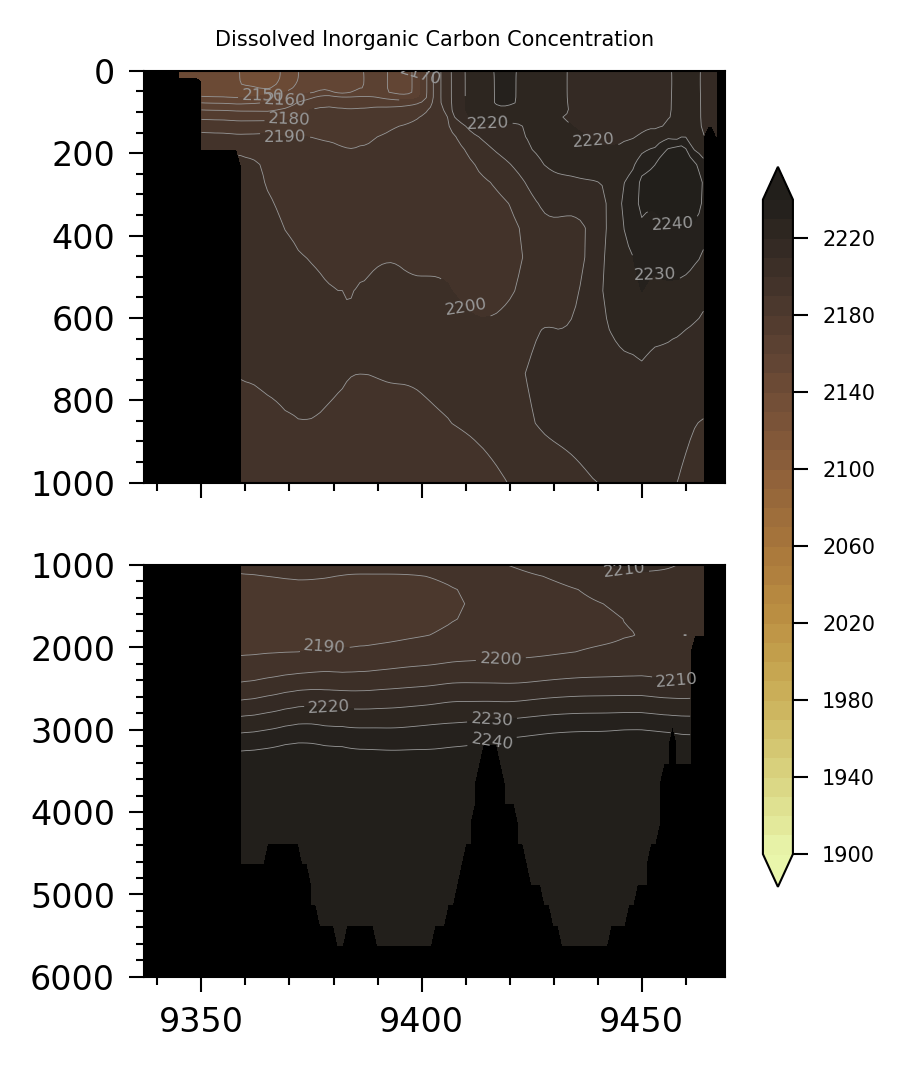

In [28]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

minvalue_conc,maxvalue_conc,cmap,nsteps,labelstep,cfactor = cprops[ovar.name]

cstep = abs(minvalue_conc-maxvalue_conc)/nsteps

cbarstep = abs(minvalue_conc-maxvalue_conc)/(nsteps/4);

contour_levs = np.arange(minvalue_conc,maxvalue_conc+cstep,cstep)

contour_labels = np.arange(minvalue_conc,maxvalue_conc+cstep,labelstep)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.dpi=300
fig.set_figheight(4)
fig.set_figwidth(2.5)
ax1.set_title(f'{section.long_name}',fontsize=5)
cax = ax1.contourf(section.station,section.depth,section.T*cfactor,levels=contour_levs,extend='both',cmap=cmap)
ax2.contourf(section.station,section.depth,section.T*1e3,levels=contour_levs,extend='both',cmap=cmap)

cs1 = ax1.contour(section.station,section.depth,section.T*cfactor,levels=contour_levs,extend='both',colors='0.6',linewidths=0.2)
ax1.clabel(cs1,fontsize=4,fmt='%1.f',levels=contour_labels)

cs2 = ax2.contour(section.station,section.depth,section.T*cfactor,levels=contour_levs,extend='both',colors='0.6',linewidths=0.2)
ax2.clabel(cs2,fontsize=4,fmt='%1.f')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.5)
    ax2.spines[axis].set_linewidth(0.5)
    
ax1.tick_params(which='both', width=0.5)
ax2.tick_params(which='both', width=0.5)

ax1.set_facecolor('k')
ax2.set_facecolor('k')
ax1.set_ylim(1000,0)
ax2.set_ylim(6000,1000)
# ax1.tick_params(which='minor', length=4, color='r')

# plt.tight_layout()

cbar_ax = fig.add_axes([0.95, 0.2, 0.04, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax,extend='both')
cbar.ax.tick_params(labelsize=5)
cbar.ax.tick_params(which='both', width=0.5)
cbar.outline.set_linewidth(0.5)

/home/sridge/.conda/envs/analysis/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


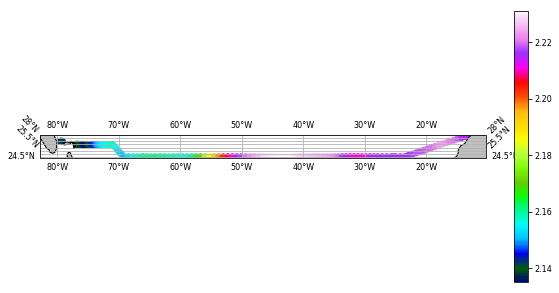

In [29]:
# plot surface data
plt.figure(figsize=[10,10])
m = plt.axes(projection=cart.crs.PlateCarree())
C = m.scatter(df[df.cruise==cruise_id]['longitude'].values,df[df.cruise==cruise_id]['latitude'].values,c=section[:,0],cmap=cm.gist_ncar)
plt.colorbar(C,shrink=0.5)
m.coastlines()
m.add_feature(cart.feature.LAND, facecolor='0.75')
# m.set_extent([-75, -30, 30, 65], crs=cart.crs.PlateCarree())
gl = m.gridlines(draw_labels=True)